In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Real estate - Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df = df.drop(columns= ['No','X5 latitude','X6 longitude'], axis=1)

In [5]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


In [7]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]

In [8]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [10]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head(8)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1
5,2012,7.1,2175.03000,3,32.1
6,2012,34.5,623.47310,7,40.3
7,2013,20.3,287.60250,6,46.7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


In [12]:
x = df.drop(columns=['Y house price of unit area'])
y = df[['Y house price of unit area']]

In [13]:
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [14]:
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


# Spliting the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [18]:
xtrain.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
7,2013,20.3,287.60250,6
194,2013,15.2,3771.89500,0
19,2012,1.5,23.38284,7
176,2012,13.9,4573.77900,0
367,2012,15.0,1828.31900,2


In [19]:
ytrain.head()

,Y house price of unit area
7,46.7
194,29.3
19,47.7
176,19.2
367,20.9


In [20]:
xtest.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
358,2013,1.1,193.5845,6
350,2013,13.2,492.2313,5
373,2013,0.0,274.0144,1
399,2012,12.7,170.1289,1
369,2012,20.2,2185.1280,3


In [21]:
ytest.head()

,Y house price of unit area
358,45.1
350,42.3
373,52.2
399,37.3
369,22.8


# Correlation

In [23]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


In [24]:
""" X1 transaction date has weak linear relationship with X2 house age,X3 distance to the nearest MRT station,
   X4 number of convenience stores,Y house price of unit area"""
""" X2 house age has weak linear relationship with X1 transaction date ,X3 distance to the nearest MRT station,
   X4 number of convenience stores,Y house price of unit area"""
""" X3 distance to the nearest MRT station has weak  linear relationship with X1 transaction date ,X2 house age,
   X4 number of convenience stores,Y house price of unit area"""
""" X4 number of convenience stores has weak  linear relationship with X1 transaction date ,X2 house age,
   X3 distance to the nearest MRT station, and have moderate linear relationship with Y house price of unit area"""
""" Y house price of unit area has weak  linear relationship with X1 transaction date ,X2 house age and have moderate linear relationship with
   X3 distance to the nearest MRT station, X4 number of convenience stores	"""
    

' Y house price of unit area has weak  linear relationship with X1 transaction date ,X2 house age and have moderate linear relationship with\n   X3 distance to the nearest MRT station, X4 number of convenience stores\t'

# Vizualize the correlation matrix using heatmap:

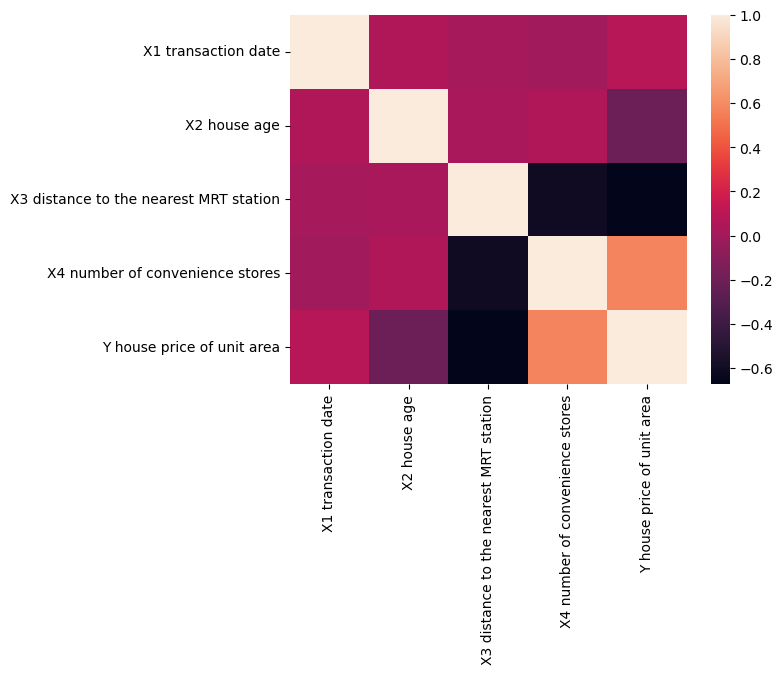

In [26]:
sns.heatmap(df.corr())
plt.show()

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [31]:
lr.coef_

array([[ 2.78410294, -0.23257624, -0.00558695,  1.27087806]])

In [32]:
lr.intercept_

array([-5560.45186776])

In [33]:
lr.predict([[2013,20.3,287.60250,6]])

array([[45.24449643]])

In [34]:
lr.predict([[2012,12.7,170.1289,1]])

array([[38.52990187]])

In [35]:
lr.score(x,y)

0.5506084305766537

In [36]:
lr.score(xtrain,ytrain)*100, lr.score(xtest,ytest)*100

(54.3755581710267, 56.43696003958125)

In [37]:
df['Predicted_Y'] = lr.predict(x)

In [38]:
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
mse = mean_squared_error(ytest,lr.predict(xtest))
mse

72.84834417663747

In [40]:
r2 = r2_score(ytest,lr.predict(xtest))
r2

0.5643696003958125

# Viz for Linear Regression

In [43]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,Predicted_Y
0,2012,32.0,84.87882,10,37.9,45.955371
1,2012,19.5,306.59470,9,42.2,46.352980
2,2013,13.3,561.98450,5,47.3,44.068693
3,2013,13.3,561.98450,5,54.8,44.068693
4,2012,5.0,390.56840,5,43.1,44.172667


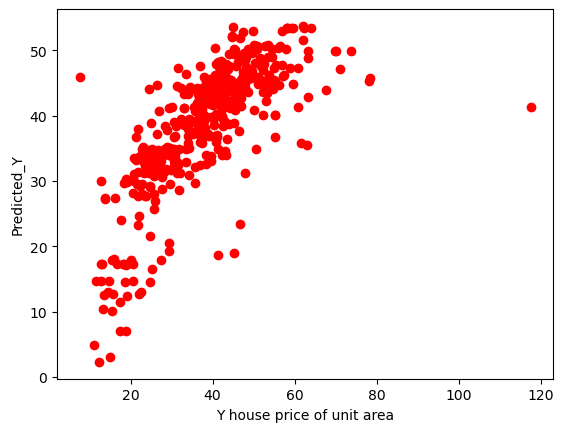

In [44]:
plt.scatter(y,df['Predicted_Y'],color = 'red')
plt.xlabel('Y house price of unit area')
plt.ylabel('Predicted_Y')
plt.show()

# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x)

In [48]:
x_poly = pd.DataFrame(x_poly)

In [49]:
x_poly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,2716.122240,320.0,7.204414e+03,848.78820,100.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,5978.596650,175.5,9.400031e+04,2759.35230,81.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,1952.842000,25.0,1.525437e+05,1952.84200,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.0,2013.0,13.7,4082.01500,0.0,4052169.0,27578.1,8.217096e+06,0.0,187.69,55923.605500,0.0,1.666285e+07,0.00000,0.0
410,1.0,2012.0,5.6,90.45606,9.0,4048144.0,11267.2,1.819976e+05,18108.0,31.36,506.553936,50.4,8.182299e+03,814.10454,81.0
411,1.0,2013.0,18.8,390.96960,7.0,4052169.0,37844.4,7.870218e+05,14091.0,353.44,7350.228480,131.6,1.528572e+05,2736.78720,49.0
412,1.0,2013.0,8.1,104.81010,5.0,4052169.0,16305.3,2.109827e+05,10065.0,65.61,848.961810,40.5,1.098516e+04,524.05050,25.0


In [50]:
xptrain,xptest,ytrain,ytest = train_test_split(x_poly,y,test_size = 0.30,random_state = 42)

In [51]:
xptrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
7,1.0,2013.0,20.3,287.60250,6.0,4052169.0,40863.9,5.789438e+05,12078.0,412.09,5838.33075,121.8,8.271520e+04,1725.61500,36.0
194,1.0,2013.0,15.2,3771.89500,0.0,4052169.0,30597.6,7.592825e+06,0.0,231.04,57332.80400,0.0,1.422719e+07,0.00000,0.0
19,1.0,2012.0,1.5,23.38284,7.0,4048144.0,3018.0,4.704627e+04,14084.0,2.25,35.07426,10.5,5.467572e+02,163.67988,49.0
176,1.0,2012.0,13.9,4573.77900,0.0,4048144.0,27966.8,9.202443e+06,0.0,193.21,63575.52810,0.0,2.091945e+07,0.00000,0.0
367,1.0,2012.0,15.0,1828.31900,2.0,4048144.0,30180.0,3.678578e+06,4024.0,225.00,27424.78500,30.0,3.342750e+06,3656.63800,4.0


In [52]:
ytrain.head()

,Y house price of unit area
7,46.7
194,29.3
19,47.7
176,19.2
367,20.9


In [53]:
xptest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
358,1.0,2013.0,1.1,193.5845,6.0,4052169.0,2214.3,3.896856e+05,12078.0,1.21,212.94295,6.6,3.747496e+04,1161.5070,36.0
350,1.0,2013.0,13.2,492.2313,5.0,4052169.0,26571.6,9.908616e+05,10065.0,174.24,6497.45316,66.0,2.422917e+05,2461.1565,25.0
373,1.0,2013.0,0.0,274.0144,1.0,4052169.0,0.0,5.515910e+05,2013.0,0.00,0.00000,0.0,7.508389e+04,274.0144,1.0
399,1.0,2012.0,12.7,170.1289,1.0,4048144.0,25552.4,3.422993e+05,2012.0,161.29,2160.63703,12.7,2.894384e+04,170.1289,1.0
369,1.0,2012.0,20.2,2185.1280,3.0,4048144.0,40642.4,4.396478e+06,6036.0,408.04,44139.58560,60.6,4.774784e+06,6555.3840,9.0


In [54]:
ytest.head()

,Y house price of unit area
358,45.1
350,42.3
373,52.2
399,37.3
369,22.8


# Linear Regression model on Polynomial features and test score

In [56]:
x_polylr = LinearRegression()

In [57]:
x_polylr.fit(xptrain,ytrain)

LinearRegression()

In [58]:
x_polylr.predict([[1.0,2013.0,1.1,193.5845,6.0,4052169.0,2214.3,3.896856e+05,12078.0,1.21,212.94295,6.6,3.747496e+04,1161.5070,36.0]])

array([[55.84850934]])

In [59]:
x_polylr.score(x_poly,y)*100

63.22146455253059

# Polynomial regression for degree 3

In [61]:
poly = PolynomialFeatures(degree = 3)
x_poly2 = poly.fit_transform(x)

In [62]:
x_poly2 = pd.DataFrame(x_poly2)

In [63]:
x_poly2.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,...,32768.000,86915.911680,10240.00,2.305413e+05,27161.22240,3200.0,6.115022e+05,7.204414e+04,8487.8820,1000.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,...,7414.875,116582.634675,3422.25,1.833006e+06,53807.36985,1579.5,2.882000e+07,8.460028e+05,24834.1707,729.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,...,2352.637,99409.438205,884.45,4.200493e+06,37371.96925,332.5,1.774896e+08,1.579133e+06,14049.6125,125.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,...,2352.637,99409.438205,884.45,4.200493e+06,37371.96925,332.5,1.774896e+08,1.579133e+06,14049.6125,125.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,...,125.000,9764.210000,125.00,7.627184e+05,9764.21000,125.0,5.957874e+07,7.627184e+05,9764.2100,125.0


In [64]:
xptrain2,xptest2,ytrain,ytest = train_test_split(x_poly2,y,test_size = 0.30,random_state = 42)

In [65]:
xptrain2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
7,1.0,2013.0,20.3,287.6025,6.0,4052169.0,40863.9,5.789438e+05,12078.0,412.09,...,8365.427,118518.114225,2472.54,1.679119e+06,35029.9845,730.8,2.378910e+07,496291.188038,10353.69,216.0
194,1.0,2013.0,15.2,3771.8950,0.0,4052169.0,30597.6,7.592825e+06,0.0,231.04,...,3511.808,871458.620800,0.00,2.162533e+08,0.0000,0.0,5.366347e+10,0.000000,0.00,0.0


In [66]:
ytrain.head(2)

,Y house price of unit area
7,46.7
194,29.3


In [67]:
xptest2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
358,1.0,2013.0,1.1,193.5845,6.0,4052169.0,2214.3,389685.5985,12078.0,1.21,...,1.331,234.237245,7.26,4.122245e+04,1277.6577,39.6,7.254571e+06,2.248498e+05,6969.0420,216.0
350,1.0,2013.0,13.2,492.2313,5.0,4052169.0,26571.6,990861.6069,10065.0,174.24,...,2299.968,85766.381712,871.20,3.198250e+06,32487.2658,330.0,1.192635e+08,1.211458e+06,12305.7825,125.0


In [68]:
ytest.head(2)

,Y house price of unit area
358,45.1
350,42.3


In [69]:
x_polylr2 = LinearRegression()

In [70]:
x_polylr2.fit(xptrain2,ytrain)

LinearRegression()

In [71]:
x_polylr2.score(x_poly2,y)*100

63.97110023197513

In [72]:
df['Predicted_Ypf'] = x_polylr2.predict(x_poly2)

In [73]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,Predicted_Y,Predicted_Ypf
0,2012,32.0,84.87882,10,37.9,45.955371,46.277446
1,2012,19.5,306.59470,9,42.2,46.352980,41.877702
2,2013,13.3,561.98450,5,47.3,44.068693,41.434526
3,2013,13.3,561.98450,5,54.8,44.068693,41.434526
4,2012,5.0,390.56840,5,43.1,44.172667,46.970469


In [74]:
mse = mean_squared_error(ytest,x_polylr2.predict(xptest2))

In [75]:
mse

63.78943052273534

In [76]:
r2 = r2_score(ytest,x_polylr2.predict(xptest2))
r2

0.6185415684704803

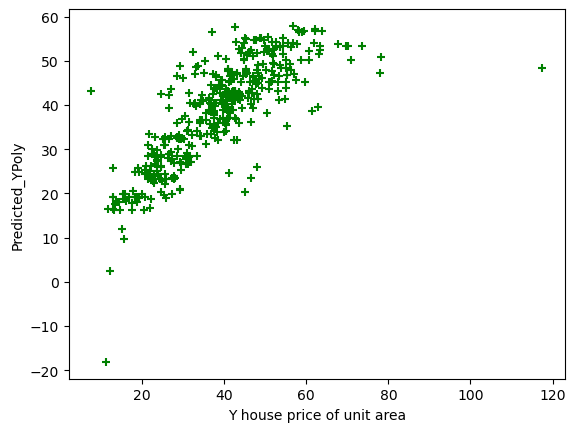

In [77]:
plt.scatter(y,df['Predicted_Ypf'],color = 'green',marker='+')
plt.xlabel('Y house price of unit area')
plt.ylabel('Predicted_YPoly')
plt.show()

## Here I can see, for polynomial regression , the MSE value is lower than linear regression 
## and r2 value is higher than linear regression
## So polynomial features regression gives better performance